In [1]:
import pandas as pd 
from fbprophet import Prophet
import itertools
import numpy as np


Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('../data/jghOccupancy.csv')
df

,ds,y
0,2012-05-01 00:00:00,39.0
1,2012-05-01 01:00:00,40.0
2,2012-05-01 02:00:00,40.0
3,2012-05-01 03:00:00,40.0
4,2012-05-01 04:00:00,39.0
...,...,...
77482,2021-03-18 09:00:00,60.0
77483,2021-03-18 10:00:00,60.0
77484,2021-03-18 11:00:00,65.0
77485,2021-03-18 12:00:00,67.0


In [16]:
m = Prophet()
m.fit(df.tail(24*365))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods=24, freq='H')
future.tail(24)

,ds
8760,2021-03-18 14:00:00
8761,2021-03-18 15:00:00
8762,2021-03-18 16:00:00
8763,2021-03-18 17:00:00
8764,2021-03-18 18:00:00
8765,2021-03-18 19:00:00
8766,2021-03-18 20:00:00
8767,2021-03-18 21:00:00
8768,2021-03-18 22:00:00
8769,2021-03-18 23:00:00


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
8779,2021-03-19 09:00:00,57.442817,47.265791,68.036151
8780,2021-03-19 10:00:00,60.372435,50.531373,70.555602
8781,2021-03-19 11:00:00,63.599568,52.604049,74.325888
8782,2021-03-19 12:00:00,66.809032,56.043826,78.025109
8783,2021-03-19 13:00:00,69.764344,59.839850,80.316675


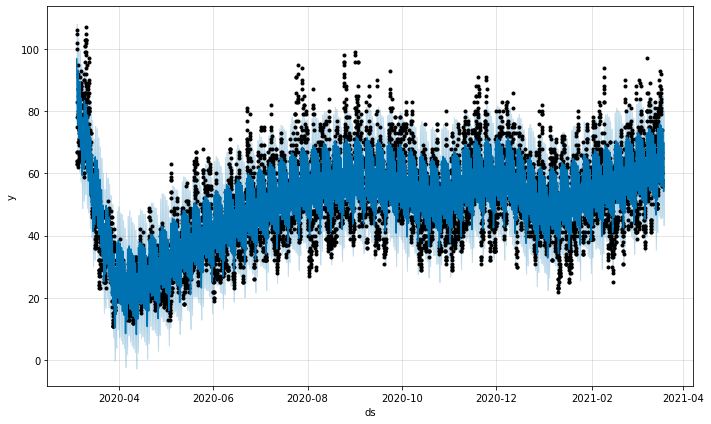

In [19]:
fig1 = m.plot(forecast)


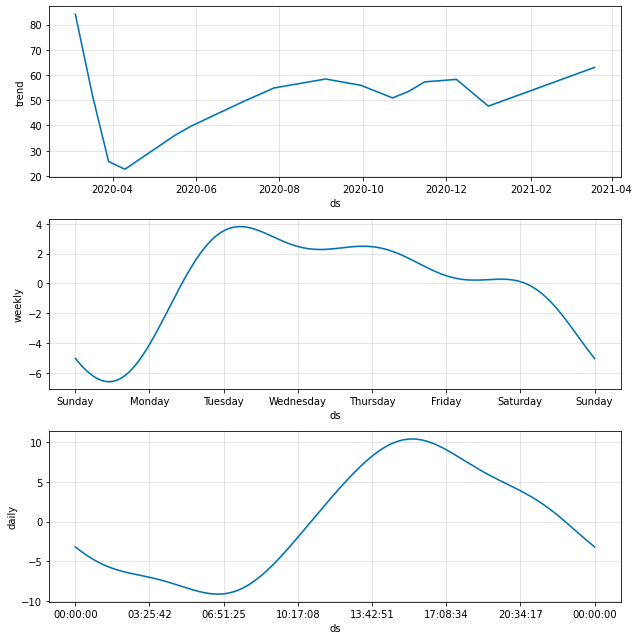

In [20]:
fig2 = m.plot_components(forecast)


In [22]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='330 days', period='24 hours', horizon='24 hours', parallel='processes')

INFO:fbprophet:Making 48 forecasts with cutoffs between 2021-01-29 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcb9dfe7ee0>


In [23]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 03:00:00,122.313850,11.059559,9.131989,0.128165,0.126757,0.657407
1,0 days 04:00:00,124.748688,11.169095,9.097085,0.126571,0.121162,0.674517
2,0 days 05:00:00,125.879370,11.219598,8.991166,0.125440,0.115713,0.673562
3,0 days 06:00:00,118.839861,10.901370,8.709279,0.123160,0.107994,0.657922
4,0 days 07:00:00,112.519100,10.607502,8.660936,0.124885,0.118871,0.663580


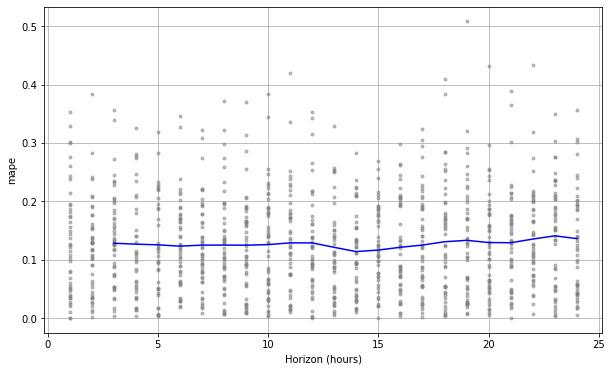

In [24]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [26]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df.tail(365*24))  # Fit model with given params
    df_cv = cross_validation(m, initial='330 days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
 21%|██        | 10/48 [07:27<28:18, 44.70s/it]
INFO:fbprophet:Making 48 forecasts with cutoffs between 2021-01-29 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccda074730>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 48 forecasts with cutoffs between 2021-01-29 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcba17ccfd0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 48 forecasts with cutoffs between 2021-01-29 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccdf1fa

In [29]:
import itertools
import numpy as np
import pandas as pd

target_df = df.tail(365*24)

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [30, 40, 50],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-30)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccfaed0bb0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcba21b6910>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccfaeb74c0>
   changepoint_prior_scale  seasonality_pri

In [37]:
import itertools
import numpy as np
import pandas as pd

target_df = df.tail(365*24)

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [40],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='CA')
    m.fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-30)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcba2d37160>
   changepoint_prior_scale  seasonality_prior_scale      rmse
0                    0.001                       40  8.973229


In [40]:
import itertools
import numpy as np
import pandas as pd

target_df = df.tail(2*365*24)

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [40],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='CA')
    m.fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-30)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcccba48250>
   changepoint_prior_scale  seasonality_prior_scale       rmse
0                    0.001                       40  21.237813


In [41]:
import itertools
import numpy as np
import pandas as pd

target_df = df.tail(3*365*24)

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [40],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='CA')
    m.fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-30)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccfc2c1880>
   changepoint_prior_scale  seasonality_prior_scale       rmse
0                    0.001                       40  15.970307


In [42]:
import itertools
import numpy as np
import pandas as pd

train_years = 1
target_df = df.tail(train_years*365*24)
cross_val_days = 30

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [10,20,30],
    'seasonality_mode': ['additive', 'multiplicative'],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='CA')
    m.fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-cross_val_days)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccda0963a0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccfc299520>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcd0af73b50>
INFO:fbprophet:Disabling yearly seasonality

In [43]:
import itertools
import numpy as np
import pandas as pd

train_years = 1
target_df = df.tail(train_years*365*24)
cross_val_days = 30

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [10],
    'seasonality_mode': ['multiplicative'],
    'changepoint_range': [0.8, 0.85, 0.9, 0.95, 0.99]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='CA')
    m.fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-cross_val_days)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcd0af738e0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcb9aec0cd0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccda074730>
INFO:fbprophet:Disabling yearly seasonality

In [44]:
train_years = 2
target_df = df.tail(train_years*365*24)
cross_val_days = 30

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [10],
    'seasonality_mode': ['multiplicative'],
    'changepoint_range': [0.8, 0.85, 0.9, 0.95, 0.99]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='CA')
    m.fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-cross_val_days)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcb9af05940>
INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcd0af73a60>
INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccec50aee0>
INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcb9aeab790>
INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with

In [45]:
train_years = 3
target_df = df.tail(train_years*365*24)
cross_val_days = 30

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [10],
    'seasonality_mode': ['multiplicative'],
    'changepoint_range': [0.8, 0.85, 0.9, 0.95, 0.99]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='CA')
    m.fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-cross_val_days)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcb9ddd0ee0>
INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcba2d2e340>
INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcb9c238ee0>
INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccfaee08b0>
INFO:fbprophet:Making 44 forecasts with cutoffs between 2021-02-02 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with

In [47]:
for train_months in [6,7,8,9,10,11,12,13,14,15,16]:
    target_df = df.tail(train_months*30*24)
    cross_val_days = 30

    param_grid = {  
        'changepoint_prior_scale': [0.001],
        'seasonality_prior_scale': [10],
        'seasonality_mode': ['multiplicative'],
        'changepoint_range': [0.9]
    }

    # Generate all combinations of parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    rmses = []  # Store the RMSEs for each params here

    # Use cross validation to evaluate all parameters
    for params in all_params:
        m = Prophet(**params)
        m.add_country_holidays(country_name='CA')
        m.fit(target_df)  # Fit model with given params
        df_cv = cross_validation(m, initial=str(len(target_df)/24-cross_val_days)+' days', period='24 hours', horizon='24 hours', parallel='processes')
        df_p = performance_metrics(df_cv, rolling_window=1)
        rmses.append(df_p['rmse'].values[0])

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['rmse'] = rmses
    print(train_months, tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 34 forecasts with cutoffs between 2021-02-12 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcd0af73250>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
6    changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                    0.001                       10   multiplicative   

   changepoint_range       rmse  
0                0.9  10.158588  
INFO:fbprophet:Making 37 forecasts with cutoffs between 2021-02-09 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccfafc37c0>
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
7    changepoint_prior_scale  seasonality_p

In [48]:
def is_monday(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0)
def is_tuesday(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 1)
def is_wednesday(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 2)
def is_thursday(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 3)
def is_friday(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 4)
def is_saturday(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5)
def is_sunday(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 6)



df['monday'] = df['ds'].apply(is_monday)
df['tuesday'] = df['ds'].apply(is_tuesday)
df['wednesday'] = df['ds'].apply(is_wednesday)
df['thursday'] = df['ds'].apply(is_thursday)
df['friday'] = df['ds'].apply(is_friday)
df['saturday'] = df['ds'].apply(is_saturday)
df['sunday'] = df['ds'].apply(is_sunday)

df.tail()


,ds,y,monday,tuesday,wednesday,thursday,friday,saturday,sunday
77482,2021-03-18 09:00:00,60.0,False,False,False,True,False,False,False
77483,2021-03-18 10:00:00,60.0,False,False,False,True,False,False,False
77484,2021-03-18 11:00:00,65.0,False,False,False,True,False,False,False
77485,2021-03-18 12:00:00,67.0,False,False,False,True,False,False,False
77486,2021-03-18 13:00:00,74.0,False,False,False,True,False,False,False


In [50]:
train_years = 1
target_df = df.tail(train_years*365*24)
cross_val_days = 30

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [10],
    'seasonality_mode': ['multiplicative'],
    'changepoint_range': [0.9],
    'daily_seasonality': [False],
    'yearly_seasonality': [False]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='CA')
    m.add_seasonality(name='monday', period=24, fourier_order=3, condition_name='monday')
    m.add_seasonality(name='tuesday', period=24, fourier_order=3, condition_name='tuesday')
    m.add_seasonality(name='wednesday', period=24, fourier_order=3, condition_name='wednesday')
    m.add_seasonality(name='thursday', period=24, fourier_order=3, condition_name='thursday')
    m.add_seasonality(name='friday', period=24, fourier_order=3, condition_name='friday')
    m.add_seasonality(name='saturday', period=24, fourier_order=3, condition_name='saturday')
    m.add_seasonality(name='sunday', period=24, fourier_order=3, condition_name='sunday')
    m.fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-cross_val_days)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcb9aeab070>
   changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                    0.001                       10   multiplicative   

   changepoint_range  daily_seasonality       rmse  
0                0.9              False  12.873554  


In [51]:
train_years = 1
target_df = df.tail(train_years*365*24)
cross_val_days = 30

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [10],
    'seasonality_mode': ['multiplicative'],
    'changepoint_range': [0.9],
    'daily_seasonality': [True],
    'yearly_seasonality': [False]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='CA')
    m.add_seasonality(name='monday', period=24, fourier_order=3, condition_name='monday')
    m.add_seasonality(name='tuesday', period=24, fourier_order=3, condition_name='tuesday')
    m.add_seasonality(name='wednesday', period=24, fourier_order=3, condition_name='wednesday')
    m.add_seasonality(name='thursday', period=24, fourier_order=3, condition_name='thursday')
    m.add_seasonality(name='friday', period=24, fourier_order=3, condition_name='friday')
    m.add_seasonality(name='saturday', period=24, fourier_order=3, condition_name='saturday')
    m.add_seasonality(name='sunday', period=24, fourier_order=3, condition_name='sunday')
    m.fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-cross_val_days)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccec4e3bb0>
   changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                    0.001                       10   multiplicative   

   changepoint_range  daily_seasonality  yearly_seasonality      rmse  
0                0.9               True               False  9.657158  


In [54]:
train_years = 1
target_df = df.tail(train_years*365*24)
cross_val_days = 30

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [10],
    'seasonality_mode': ['multiplicative'],
    'changepoint_range': [0.9],
    'daily_seasonality': [True, False],
    'yearly_seasonality': [False]
}


for day in ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']:
    print(day)
    # Generate all combinations of parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    rmses = []  # Store the RMSEs for each params here



    # Use cross validation to evaluate all parameters
    for params in all_params:
        m = Prophet(**params)
        m.add_country_holidays(country_name='CA')
        m.add_seasonality(name=day, period=24, fourier_order=3, condition_name=day)
        m.fit(target_df)  # Fit model with given params
        df_cv = cross_validation(m, initial=str(len(target_df)/24-cross_val_days)+' days', period='24 hours', horizon='24 hours', parallel='processes')
        df_p = performance_metrics(df_cv, rolling_window=1)
        rmses.append(df_p['rmse'].values[0])

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['rmse'] = rmses
    print(tuning_results)

monday
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcb9b376f70>
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcd27529f70>
   changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                    0.001                       10   multiplicative   
1                    0.001                       10   multiplicative   

   changepoint_range  daily_seasonality  yearly_seasonality       rmse  
0                0.9               True               False   9.182884  
1                0.9              False               False  12.396880  
tuesday
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Appl

In [56]:
train_years = 1
target_df = df.tail(train_years*365*24)
cross_val_days = 30

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [10],
    'seasonality_mode': ['multiplicative'],
    'changepoint_range': [0.9],
    'daily_seasonality': [True],
    'yearly_seasonality': [False]
}


for day in ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']:
# Generate all combinations of parameters
    all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
    rmses = []  # Store the RMSEs for each params here



    # Use cross validation to evaluate all parameters
    for params in all_params:
        m = Prophet(**params)
        m.add_country_holidays(country_name='CA')
        for day in ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']:
            m.add_seasonality(name=day, period=24, fourier_order=3, condition_name=day)
        m.fit(target_df)  # Fit model with given params
        df_cv = cross_validation(m, initial=str(len(target_df)/24-cross_val_days)+' days', period='24 hours', horizon='24 hours', parallel='processes')
        df_p = performance_metrics(df_cv, rolling_window=1)
        rmses.append(df_p['rmse'].values[0])

    # Find the best parameters
    tuning_results = pd.DataFrame(all_params)
    tuning_results['rmse'] = rmses
    print(tuning_results)

INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fcb9ae85670>
   changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                    0.001                       10   multiplicative   

   changepoint_range  daily_seasonality  yearly_seasonality      rmse  
0                0.9               True               False  9.657158  
INFO:fbprophet:Making 43 forecasts with cutoffs between 2021-02-03 13:00:00 and 2021-03-17 13:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fccdf1e9dc0>
   changepoint_prior_scale  seasonality_prior_scale seasonality_mode  \
0                    0.001                       10   multiplicative   

   changepoint_range  daily_seasonality  yearly_seasonality      rmse  
0                0.9               True               False  9.6

KeyboardInterrupt: 

In [58]:
train_years = 1
target_df = df.tail(train_years*365*24)
cross_val_days = 30

param_grid = {  
    'changepoint_prior_scale': [0.001],
    'seasonality_prior_scale': [10],
    'seasonality_mode': ['multiplicative'],
    'changepoint_range': [0.9],
    'daily_seasonality': [True],
    'yearly_seasonality': [False]
}



# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here



# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params)
    m.add_country_holidays(country_name='CA')
    for day in ['monday','tuesday']:
        m.add_seasonality(name=day, period=24, fourier_order=3, condition_name=day)
    m.fit(target_df)  # Fit model with given params
    df_cv = cross_validation(m, initial=str(len(target_df)/24-cross_val_days)+' days', period='24 hours', horizon='24 hours', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

SystemError: <class 'stanfit4anon_model_dfdaf2b8ece8a02eb11f050ec701c0ec_3689584490073882110.PyStanHolder'> returned a result with an error set